In [1]:
# allows to import own functions
import sys
import os
import re
root_project = re.findall(r'(^\S*TFM-master)', os.getcwd())[0]
sys.path.append(root_project)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import json
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.features.add_features import features_graph, features_pop
from src.utils.help_func import results_searchcv



sns.set()

In [2]:
df = pd.read_csv(f'{root_project}/data/processed/simulation_results.csv')
df

i_country         R0        Tc         Tr     omega     inf_pow_1  \
0            LBN   9.490802  2.214174  21.014286  0.069029  2.918571e+03   
1            KIR   3.161672  6.111805  19.323523  0.012080  1.265010e+05   
2            MOZ  16.439975  1.263448  20.771054  0.046275  8.045407e+04   
3            ERI   2.141326  1.149404   2.461249  0.014779  5.593643e+03   
4            VCT   9.327237  1.192357  11.121400  0.058201  9.880857e+03   
...          ...        ...       ...        ...       ...           ...   
146879       KAZ  11.763182  1.447605  17.028439  0.278547  6.074571e+03   
146880       ITA  10.734467  0.201486   2.162848  0.029374  2.984051e+08   
146881       ARM  19.957722  0.655780  13.087873  0.078398  2.532314e+05   
146882       AZE  13.648353  0.278279   3.798044  0.093562  2.234922e+07   
146883       LBN   9.490802  2.214174  21.014286  0.069029  2.918571e+03   

           inf_pow_2  mort_pow_1  mort_pow_2  mort_pow_3  limit_deaths  \
0       1.140780e+02    0.007146    0.005701    0.048225            72   
1       2.916422e+02    0.003715    0.002368    0.007072           872   
2       2.297547e+03    0.002847    0.001771    0.026642           192   
3       1.969175e+02    0.006883    0.009034    0.010026           511   
4       2.862489e+02    0.013316    0.013809    0.044225           958   
...              ...         ...         ...         ...           ...   
146879  9.460448e+02    0.023576    0.015816    0.169786            76   
146880  3.300158e+06    0.009123    0.012621    0.014495           434   
146881  6.713776e+03    0.016655    0.016688    0.061060           788   
146882  1.928435e+06    0.010039    0.004640    0.029322           314   
146883  1.140780e+02    0.007146    0.005701    0.048225            72   

        n_closed  react_time  total_infected   total_death  total_removed  
0              6          23    7.509688e+09  5.191675e+08   7.521476e+09  
1              2           2    7.166248e+09  8.694994e+07   7.201020e+09  
2              0          22    7.530737e+09  3.532065e+08   7.633573e+09  
3              9          28    6.401541e+09  9.461014e+07   6.402090e+09  
4             18          20    7.477989e+09  4.352523e+08   7.478614e+09  
...          ...         ...             ...           ...            ...  
146879        15          29    7.504537e+09  2.090856e+09   7.506367e+09  
146880        12          21    7.512071e+09  2.206617e+08   7.512265e+09  
146881         3          14    7.535460e+09  5.919213e+08   7.550623e+09  
146882         0          12    7.552275e+09  7.113103e+08   7.602798e+09  
146883         6          23    7.509709e+09  5.192600e+08   7.522849e+09  

[146884 rows x 16 columns]

In [3]:
df.describe()

R0             Tc             Tr          omega  \
count  146884.000000  146884.000000  146884.000000  146884.000000   
mean       12.028352       1.440336      12.003049       0.109787   
std         5.788282       1.409803       5.771315       0.099859   
min         2.001378       0.091932       2.000186       0.010001   
25%         6.991695       0.578133       7.002722       0.038674   
50%        12.042934       0.997252      12.026332       0.079147   
75%        17.055764       1.719812      16.979856       0.148305   
max        21.999739      10.792982      21.999318       1.278734   

          inf_pow_1     inf_pow_2     mort_pow_1     mort_pow_2  \
count  1.468840e+05  1.468840e+05  146884.000000  146884.000000   
mean   1.163293e+07  3.059856e+05       0.019619       0.024931   
std    5.129007e+07  1.612302e+06       0.025050       0.285450   
min    5.000000e+00  8.826531e-01       0.000530       0.000100   
25%    4.886643e+03  2.399603e+02       0.005402       0.004013   
50%    9.413129e+04  3.432829e+03       0.011435       0.009137   
75%    1.009654e+06  3.404500e+04       0.023737       0.021985   
max    5.362096e+08  7.365089e+07       0.546882      69.778559   

          mort_pow_3   limit_deaths       n_closed     react_time  \
count  146884.000000  146884.000000  146884.000000  146884.000000   
mean        0.068038     501.478520       9.525197      15.022038   
std         0.063447     288.786443       5.768934       8.378839   
min         0.000008       1.000000       0.000000       1.000000   
25%         0.023870     251.000000       5.000000       8.000000   
50%         0.048385     502.000000      10.000000      15.000000   
75%         0.090909     752.000000      15.000000      22.000000   
max         0.784467     999.000000      19.000000      29.000000   

       total_infected   total_death  total_removed  
count    1.468840e+05  1.468840e+05   1.468840e+05  
mean     6.730110e+09  7.235684e+08   6.743937e+09  
std      1.654061e+09  7.004176e+08   1.659003e+09  
min      8.991000e+03  5.310000e+02   8.992000e+03  
25%      6.748639e+09  2.346119e+08   6.752790e+09  
50%      7.502795e+09  5.093043e+08   7.505009e+09  
75%      7.512875e+09  9.824219e+08   7.516132e+09  
max      7.582232e+09  9.689799e+09   7.665912e+09

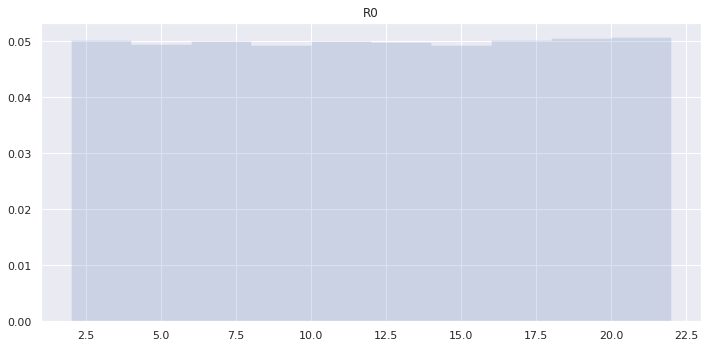

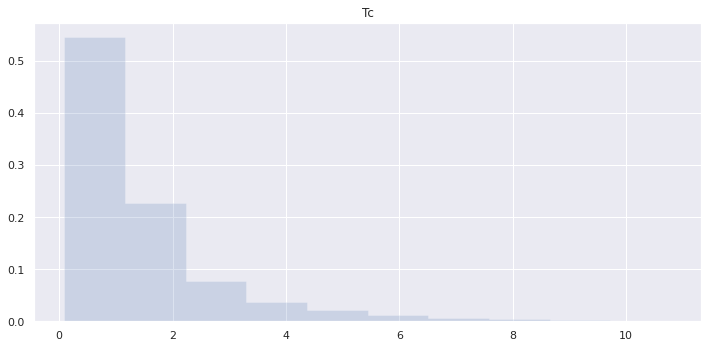

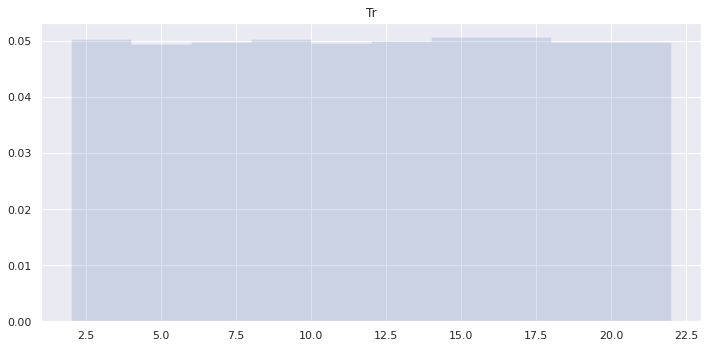

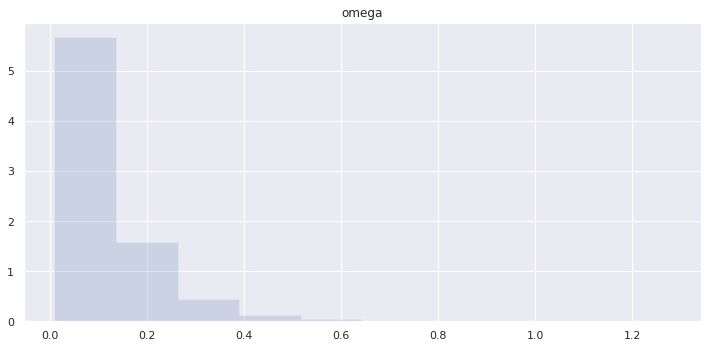

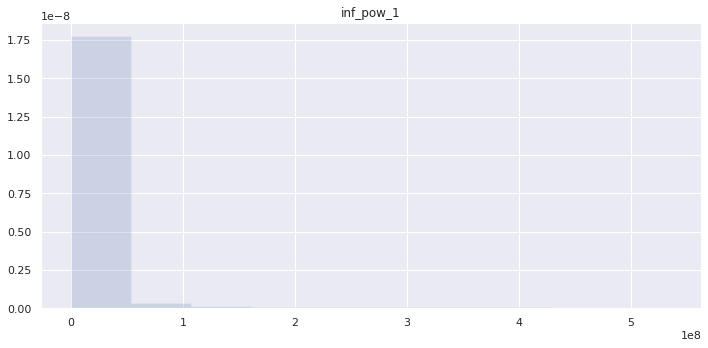

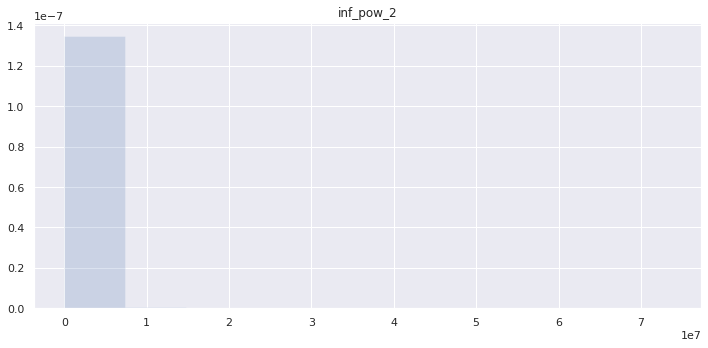

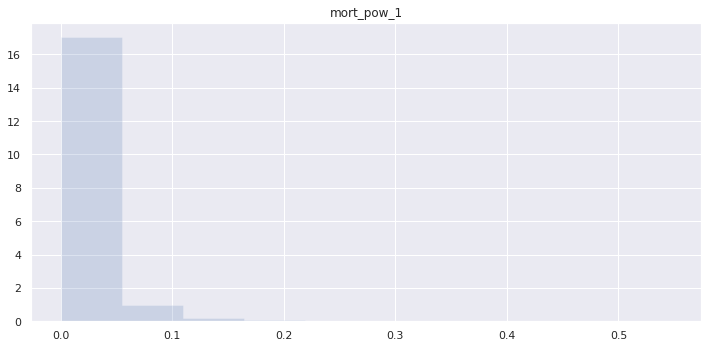

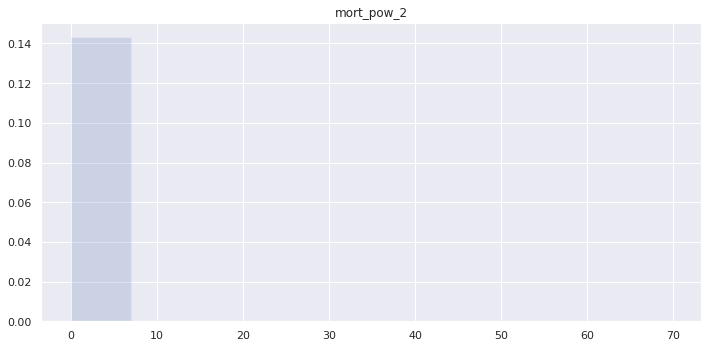

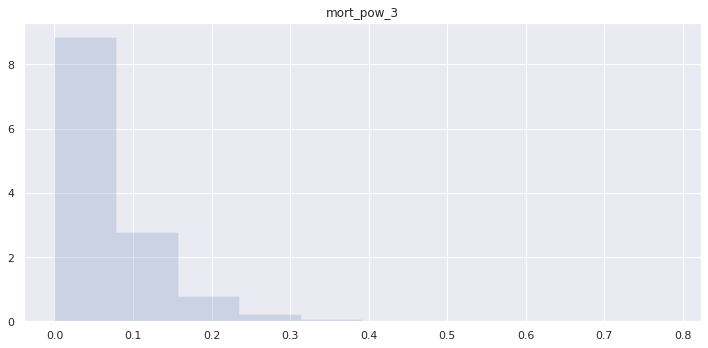

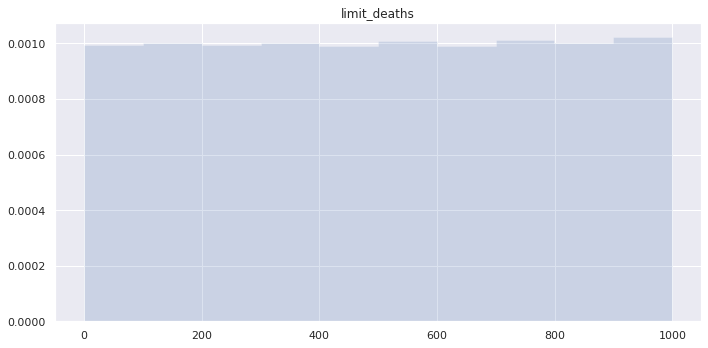

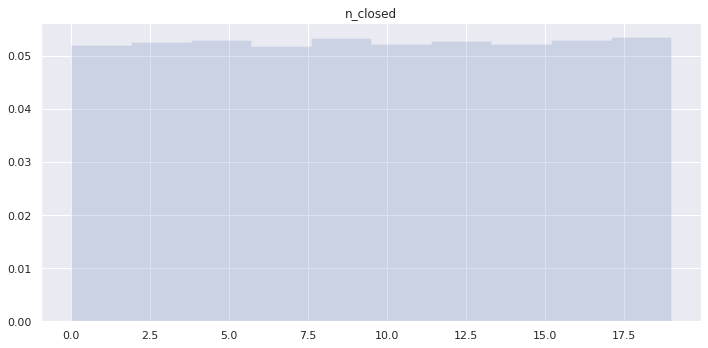

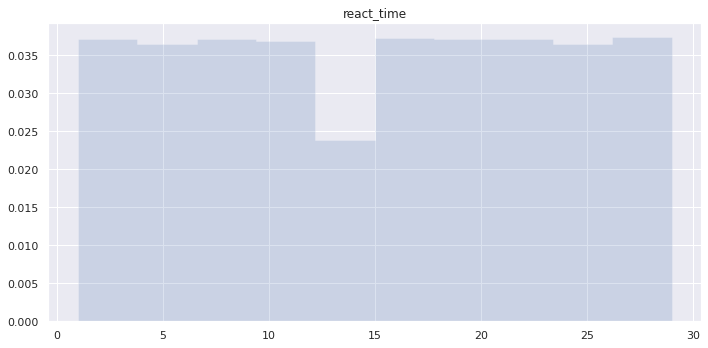

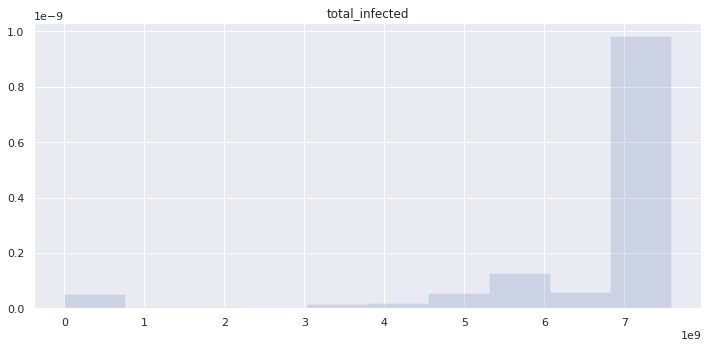

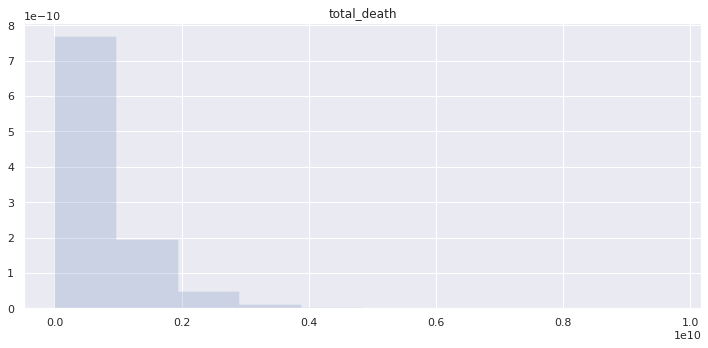

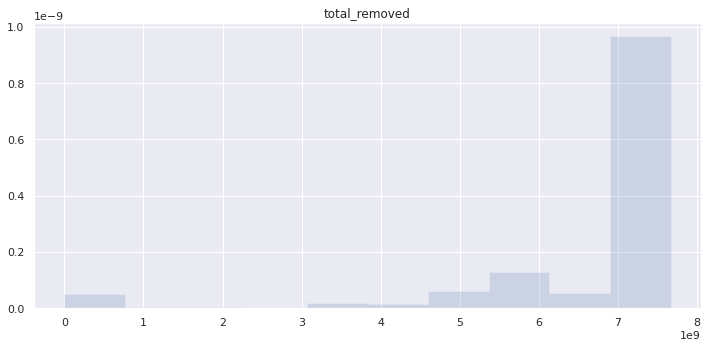

In [4]:
columns = df.describe().columns

for c in columns:
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    # df[c].plot(kind='hist', ax=ax, title=str(c))
    ax.hist(df[c], density=True, histtype='stepfilled', alpha=0.2)
    ax.set(title=str(c))
    plt.tight_layout()

In [5]:
df = features_graph(df)
df = features_pop(df)
df

i_country         R0        Tc         Tr     omega     inf_pow_1  \
0            LBN   9.490802  2.214174  21.014286  0.069029  2.918571e+03   
1            KIR   3.161672  6.111805  19.323523  0.012080  1.265010e+05   
2            MOZ  16.439975  1.263448  20.771054  0.046275  8.045407e+04   
3            ERI   2.141326  1.149404   2.461249  0.014779  5.593643e+03   
4            VCT   9.327237  1.192357  11.121400  0.058201  9.880857e+03   
...          ...        ...       ...        ...       ...           ...   
146879       KAZ  11.763182  1.447605  17.028439  0.278547  6.074571e+03   
146880       ITA  10.734467  0.201486   2.162848  0.029374  2.984051e+08   
146881       ARM  19.957722  0.655780  13.087873  0.078398  2.532314e+05   
146882       AZE  13.648353  0.278279   3.798044  0.093562  2.234922e+07   
146883       LBN   9.490802  2.214174  21.014286  0.069029  2.918571e+03   

           inf_pow_2  mort_pow_1  mort_pow_2  mort_pow_3  limit_deaths  \
0       1.140780e+02    0.007146    0.005701    0.048225            72   
1       2.916422e+02    0.003715    0.002368    0.007072           872   
2       2.297547e+03    0.002847    0.001771    0.026642           192   
3       1.969175e+02    0.006883    0.009034    0.010026           511   
4       2.862489e+02    0.013316    0.013809    0.044225           958   
...              ...         ...         ...         ...           ...   
146879  9.460448e+02    0.023576    0.015816    0.169786            76   
146880  3.300158e+06    0.009123    0.012621    0.014495           434   
146881  6.713776e+03    0.016655    0.016688    0.061060           788   
146882  1.928435e+06    0.010039    0.004640    0.029322           314   
146883  1.140780e+02    0.007146    0.005701    0.048225            72   

        n_closed  react_time  total_infected   total_death  total_removed  \
0              6          23    7.509688e+09  5.191675e+08   7.521476e+09   
1              2           2    7.166248e+09  8.694994e+07   7.201020e+09   
2              0          22    7.530737e+09  3.532065e+08   7.633573e+09   
3              9          28    6.401541e+09  9.461014e+07   6.402090e+09   
4             18          20    7.477989e+09  4.352523e+08   7.478614e+09   
...          ...         ...             ...           ...            ...   
146879        15          29    7.504537e+09  2.090856e+09   7.506367e+09   
146880        12          21    7.512071e+09  2.206617e+08   7.512265e+09   
146881         3          14    7.535460e+09  5.919213e+08   7.550623e+09   
146882         0          12    7.552275e+09  7.113103e+08   7.602798e+09   
146883         6          23    7.509709e+09  5.192600e+08   7.522849e+09   

        betweenness    degree  closeness  country_pop  
0          0.001057  0.270270   0.460581    6848925.0  
1          0.000956  0.036036   0.391534     115847.0  
2          0.000059  0.054054   0.382759   29495962.0  
3          0.000007  0.049550   0.368159    3213972.0  
4          0.000035  0.040541   0.312236     110210.0  
...             ...       ...        ...          ...  
146879     0.000831  0.216216   0.449393   18276499.0  
146880     0.017998  0.707207   0.572165   60431283.0  
146881     0.000054  0.117117   0.424474    2951776.0  
146882     0.000554  0.198198   0.449393    9942334.0  
146883     0.001057  0.270270   0.460581    6848925.0  

[146884 rows x 20 columns]

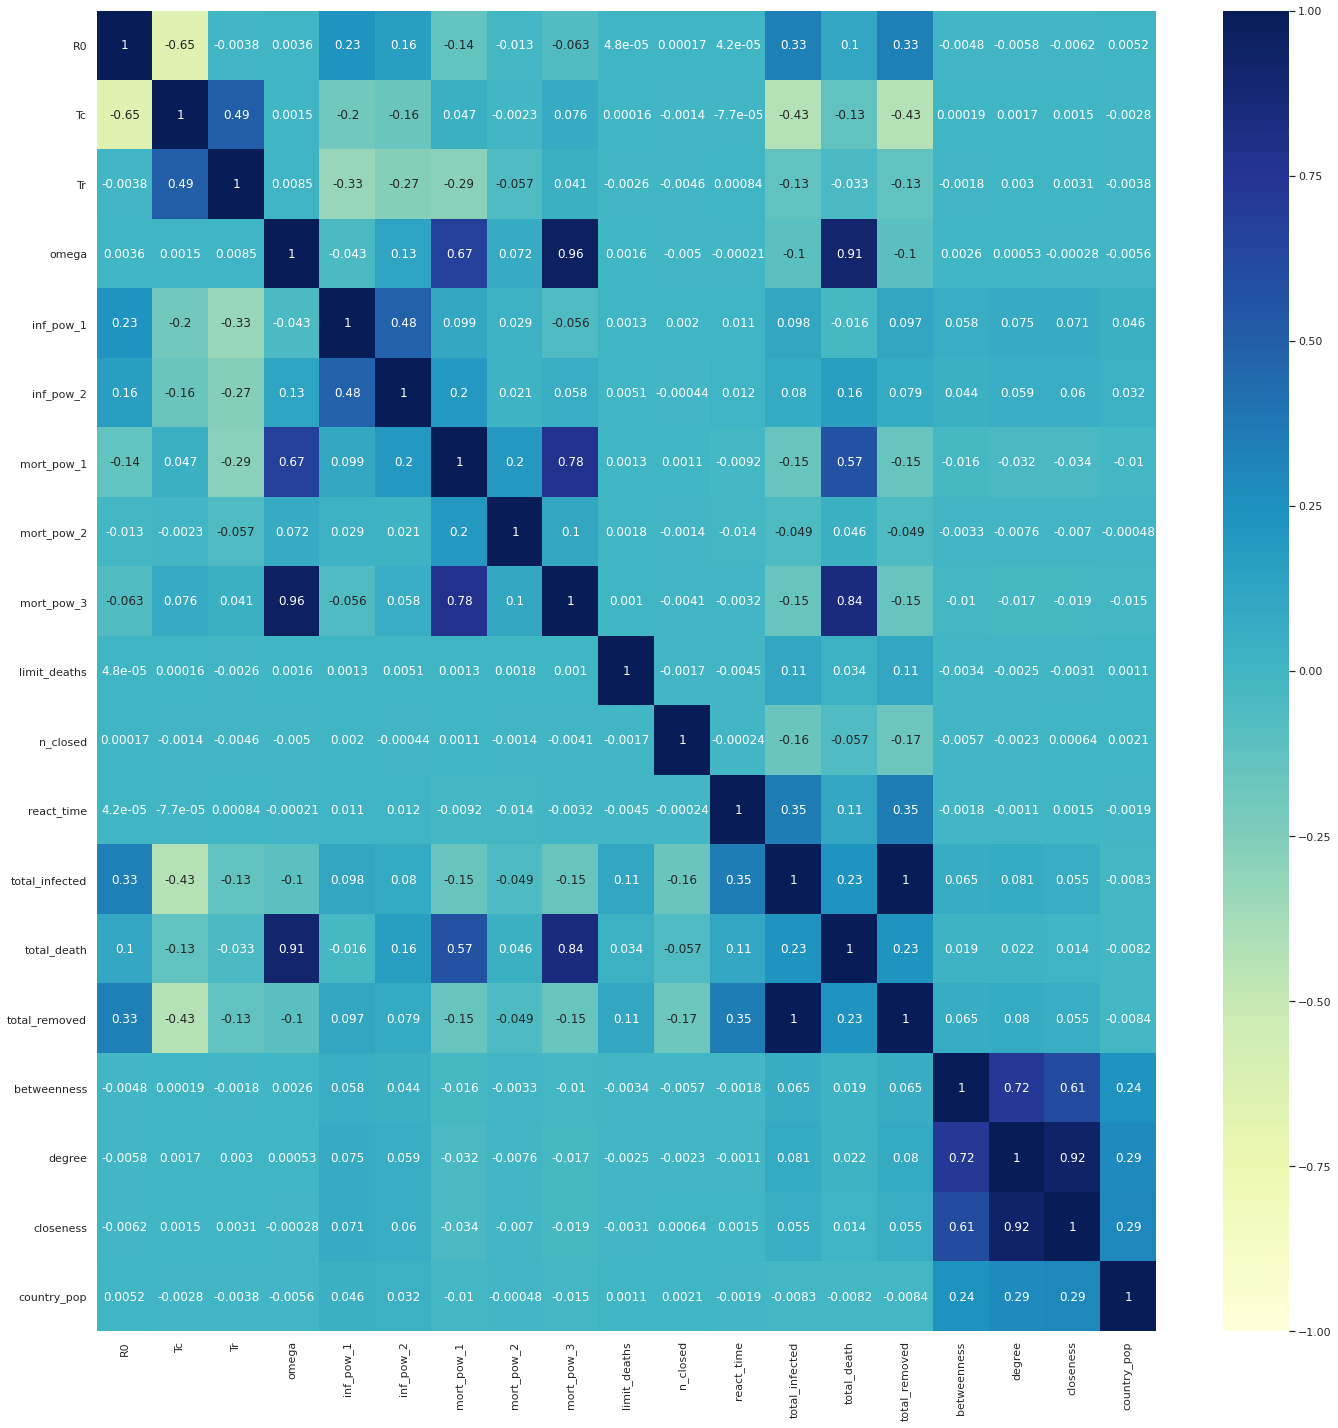

In [6]:
corr_matrix = df.corr()
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.heatmap(corr_matrix, vmax=1, vmin=-1, annot=True, cmap="YlGnBu", ax=ax)
plt.tight_layout()

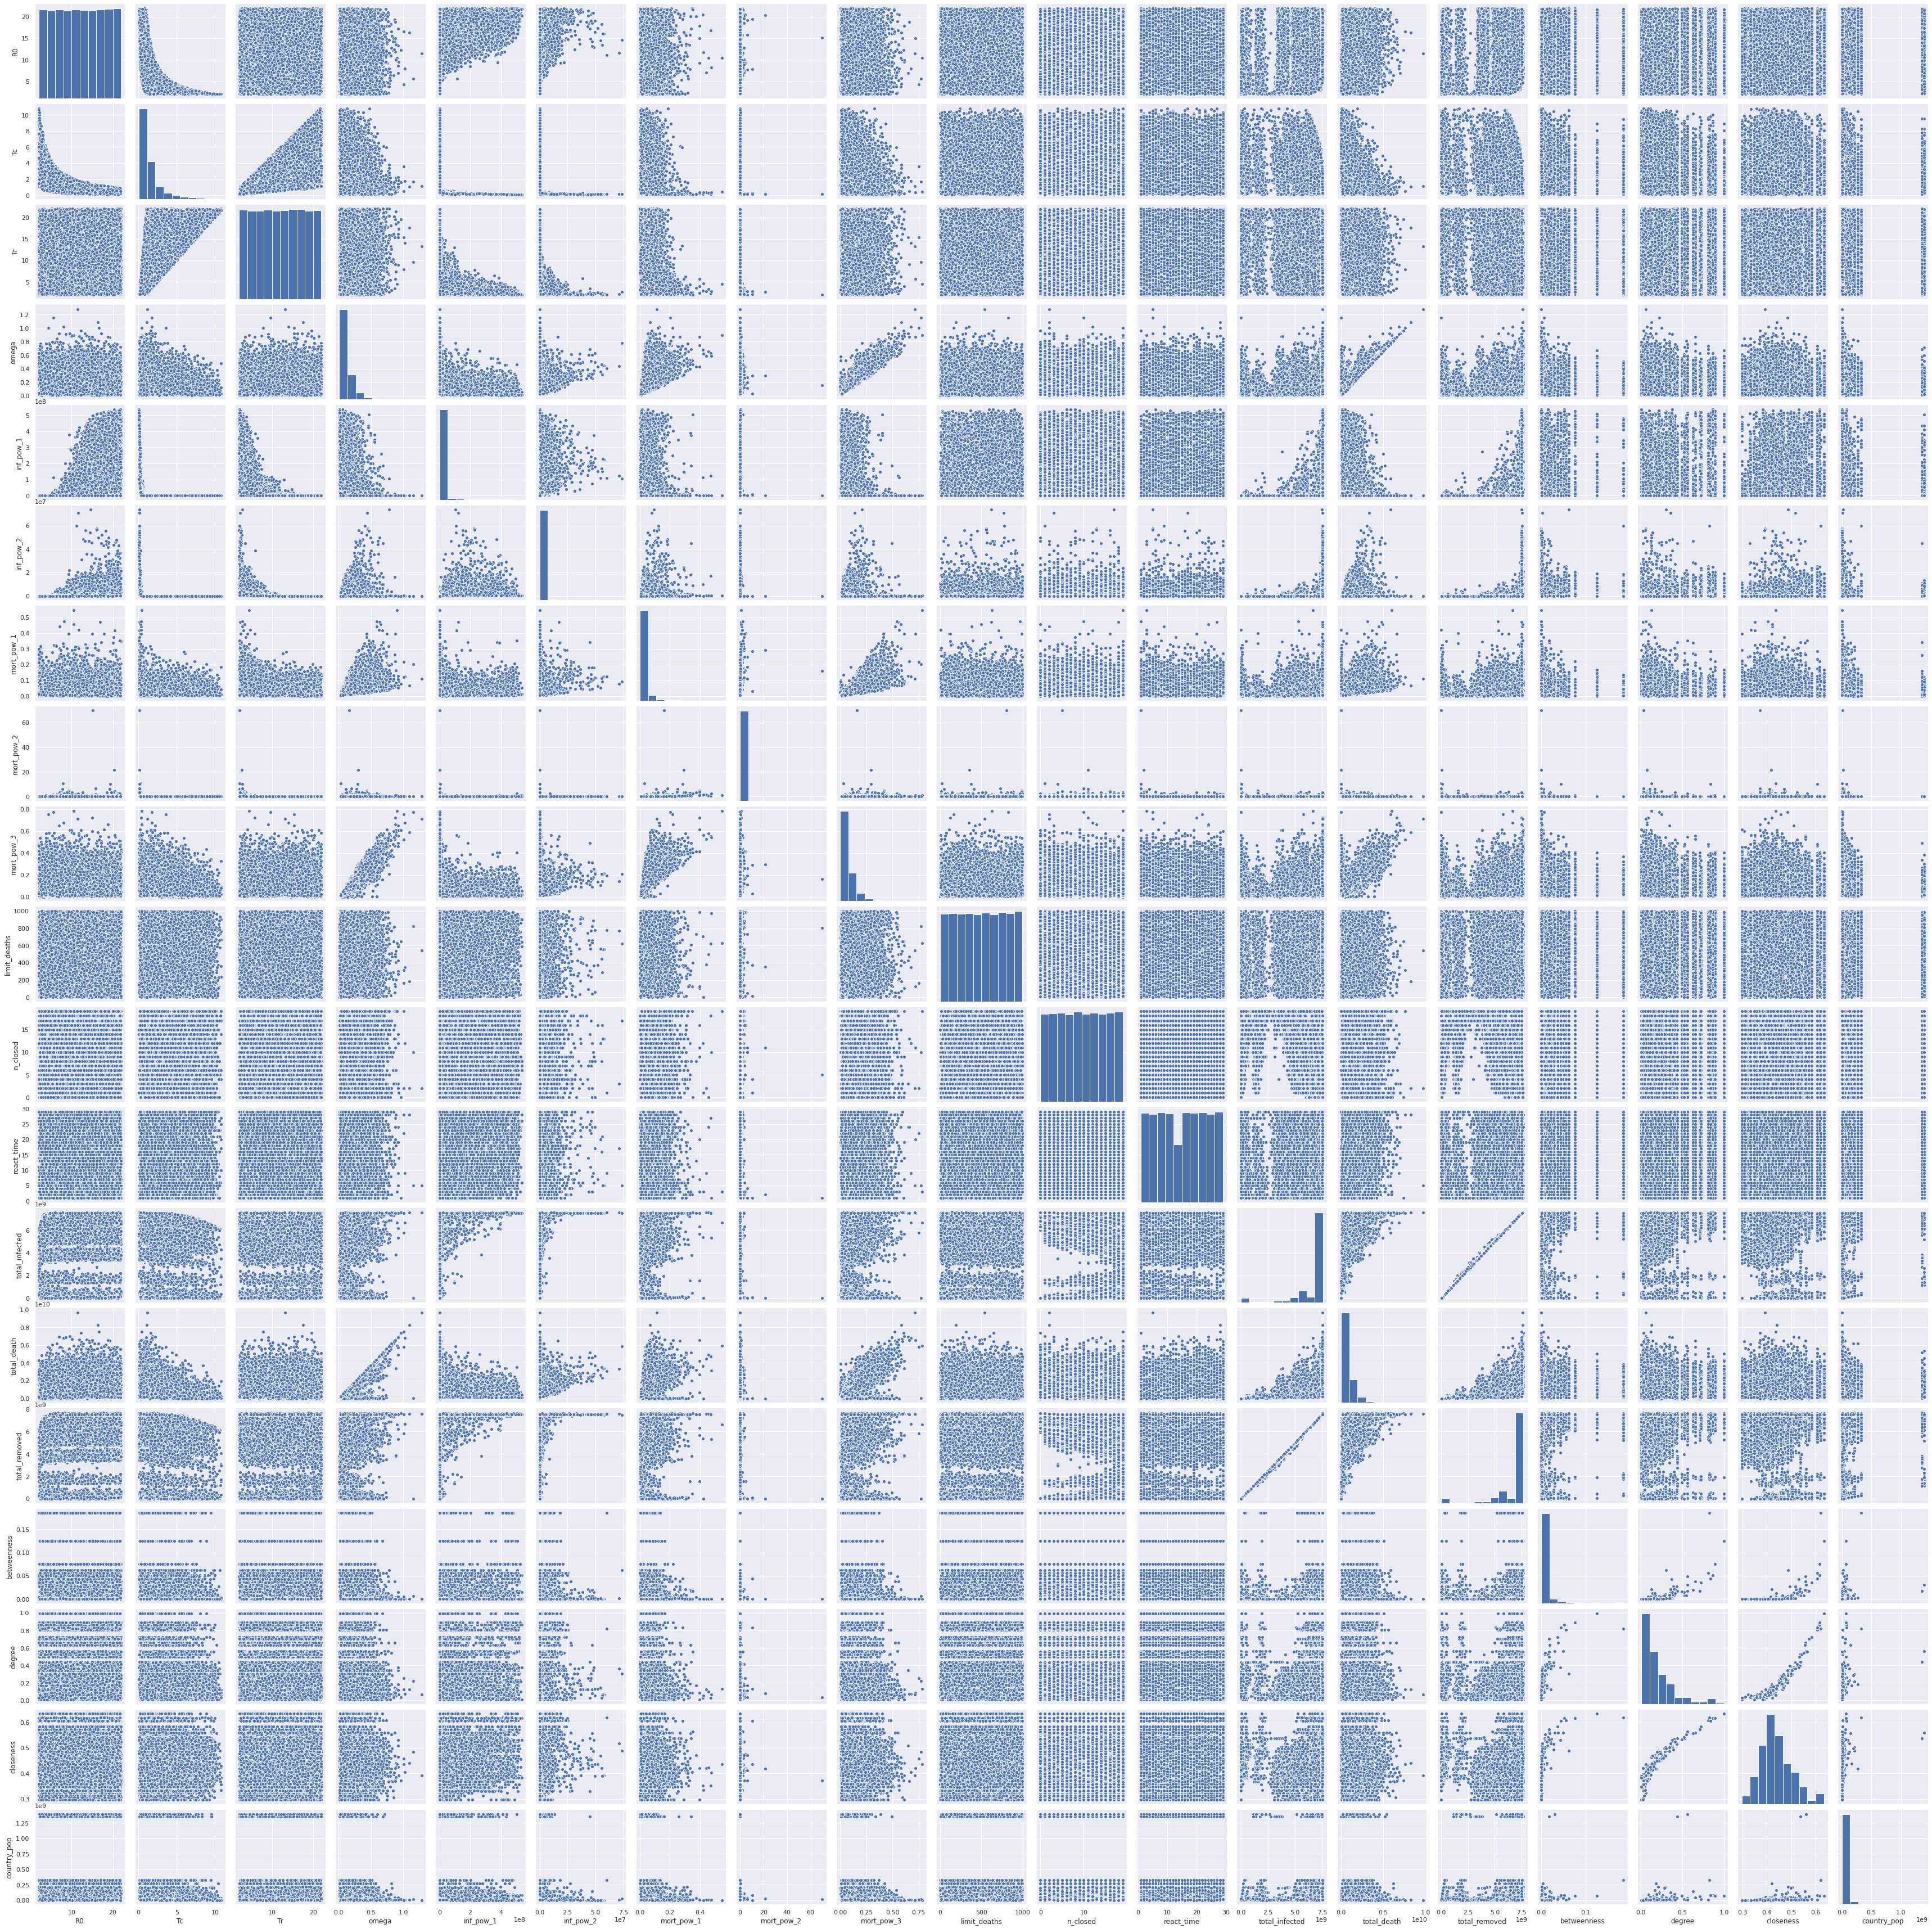

In [8]:
sns.pairplot(df)